In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Synthetic Data Generation ---
def generate_synthetic_data(m):
    # For example, let x1, x2, x3 be inputs drawn from a uniform distribution
    X = np.random.uniform(-1, 1, (3, m))
    # Non-linear equation: y = sin(pi*x1) + log(|x2|+1) + x3^2
    Y = np.sin(np.pi * X[0, :]) + np.log(np.abs(X[1, :]) + 1) + X[2, :]**2
    Y = Y.reshape(1, m)
    return X, Y

In [ ]:
# --- Activation Functions and Derivatives ---
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z<=0] = 0
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

In [ ]:
# --- Parameter Initialization ---
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)  # number of layers including input
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

In [ ]:
# --- Forward Propagation ---
def linear_forward(A_prev, W, b):
    Z = np.dot(W, A_prev) + b
    cache = (A_prev, W, b)
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    Z, linear_cache = linear_forward(A_prev, W, b)
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2  # number of layers
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev,
                                             parameters['W'+str(l)],
                                             parameters['b'+str(l)],
                                             activation="relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A,
                                          parameters['W'+str(L)],
                                          parameters['b'+str(L)],
                                          activation="sigmoid")
    caches.append(cache)
    return AL, caches


In [ ]:
# --- Compute Cost ---
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -(1/m)*np.sum(Y*np.log(AL) + (1-Y)*np.log(1-AL))
    cost = np.squeeze(cost)
    return cost


In [ ]:
# --- Backward Propagation Functions ---
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = (1/m)*np.dot(dZ, A_prev.T)
    db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = -(np.divide(Y, AL) - np.divide(1-Y, 1-AL))
    current_cache = caches[L-1]
    grads["dA"+str(L-1)], grads["dW"+str(L)], grads["db"+str(L)] = linear_activation_backward(dAL, current_cache, activation="sigmoid")
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)], current_cache, activation="relu")
        grads["dA"+str(l)] = dA_prev_temp
        grads["dW"+str(l+1)] = dW_temp
        grads["db"+str(l+1)] = db_temp
    return grads

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters)//2
    for l in range(1, L+1):
        parameters["W"+str(l)] = parameters["W"+str(l)] - learning_rate*grads["dW"+str(l)]
        parameters["b"+str(l)] = parameters["b"+str(l)] - learning_rate*grads["db"+str(l)]
    return parameters


In [ ]:
# --- Example Run ---
layer_dims = [3, 5, 4, 1]  # 3-layer model: input (3), 2 hidden layers (5 and 4 units), output (1)
parameters = initialize_parameters_deep(layer_dims)
X, Y = generate_synthetic_data(209)
AL, caches = L_model_forward(X, parameters)
cost = compute_cost(AL, Y)
print("Cost:", cost)


Cost: 0.6931474702097481


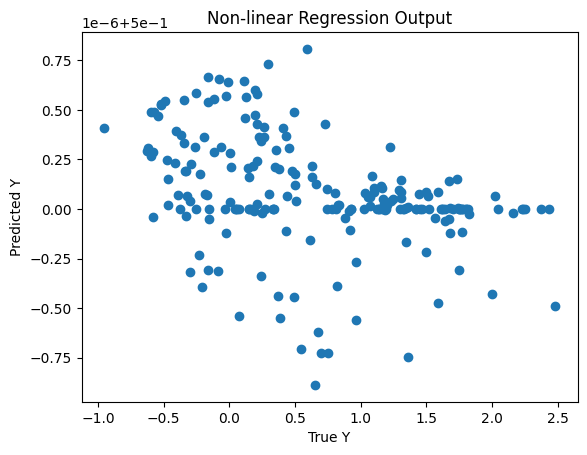

In [ ]:
# --- Plot the synthetic data or model output as needed ---
plt.plot(Y.flatten(), AL.flatten(), 'o')
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("Non-linear Regression Output")
plt.show()